In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical


In [2]:
colors = ['#BB0000', '#0000BB', 'green','red', 'yellow', 'pink']

def prinUserSensorData(dataS, label,s):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    #print(dataS.shape)
    for t in range(0,dataS.shape[0]):
        ts.append(dataS[t][0])
    df['Time']=ts
    #print(ts)
#    for s in range(1,dataS.shape[1]):
    ls.append(label+" #column-"+str(s))
    #print(dataS[:,s].shape)
    df[label+" #column-"+str(s)]=dataS[:,s]

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,5), color=colors[s-1])    
    


In [3]:
import numpy as np

folder = "./data"

users = ["Beret"]
files = ["diagonal1", "diagonal2", "doublepoling1", "doublepoling2", "herringbone1", "herringbone2", "kickdoublepoling1", "kickdoublepoling2"]


cross = [0, 1, 0, 1, 0, 1, 0, 1]

sensors = ["s1", "s2"]

tW = list(range(-5000,100, 50))

print(tW)
print(len(tW))

tStep = 150

index_t = 0

def getAVG(vs):
    if len(vs) == 0:
        return 0
    if np.isnan(np.median(vs)):
        return -1
    return np.median(vs)

def smoothData(data):
    for ix in range(1, 6):
        data[:, ix] = data[:, ix].astype(float)
        lastV = 0.0
        for jx in range(len(data[:, ix])):
            data[jx, ix] = data[jx, ix] * 0.2 + lastV * 0.8
            lastV = data[jx, ix]

def smoothDataTime(data):
    data[:, 0] = data[:, 0].astype(float)
    tA = []
    lastT = -1
    for jx in range(len(data[:, 0])):
        t0 = data[jx, 0]
        if t0 > lastT + 50:
            lastT = t0
            tA.append(t0)
    retV = np.zeros((len(tA), 7))
    for ix in range(1, 7):
        data[:, ix] = data[:, ix].astype(float)
        lastT = -1
        lV = []
        vA = []
        for jx in range(len(data[:, ix])):
            t0 = data[jx, 0]
            if t0 > lastT + 50:
                lastT = t0
                vA.append(np.median(lV))
                lV = []
            else:
                lV.append(data[jx, ix])
        retV[:, ix] = np.array(vA)
    retV[:, 0] = np.array(tA)
    return retV

def cleanDataFile(filename):
    ret = []
    count = 0
    with open(filename) as file:
        next(file)
        for line0 in file:
            count += 1
            line = line0.strip()
            line = line.replace(',', '.').split('\t')
            if len(line) != 7:
                print("NOT 7# in ", count, " -> ", line)
                continue
            try:
                ret.append([float(x) for x in line])
            except ValueError as e:
                print("Error in line ", line, ":", e)
    return ret

def getLabels(t0, labels):
    for l in labels:
        if l[0] <= t0 <= l[1]:
            return l[2]
    return None


[-5000, -4950, -4900, -4850, -4800, -4750, -4700, -4650, -4600, -4550, -4500, -4450, -4400, -4350, -4300, -4250, -4200, -4150, -4100, -4050, -4000, -3950, -3900, -3850, -3800, -3750, -3700, -3650, -3600, -3550, -3500, -3450, -3400, -3350, -3300, -3250, -3200, -3150, -3100, -3050, -3000, -2950, -2900, -2850, -2800, -2750, -2700, -2650, -2600, -2550, -2500, -2450, -2400, -2350, -2300, -2250, -2200, -2150, -2100, -2050, -2000, -1950, -1900, -1850, -1800, -1750, -1700, -1650, -1600, -1550, -1500, -1450, -1400, -1350, -1300, -1250, -1200, -1150, -1100, -1050, -1000, -950, -900, -850, -800, -750, -700, -650, -600, -550, -500, -450, -400, -350, -300, -250, -200, -150, -100, -50, 0, 50]
102


In [4]:
#for ixu,us in enumerate(users):    
    #for ixc,cl in enumerate(files):
            #for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                #print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=np.array(data)
                #print(data.shape)
                #data=smoothDataTime(data)
                #print(data.shape)
                #for s in range(1,7):
                #    prinUserSensorData(data, "us:"+us+"file:"+cl+"#sensor:"+sn,s)

In [5]:
X=[]
Y=[]
S=[]
N=0



for ixu,us in enumerate(users):    
    for ixc,cl in enumerate(files):
            t0=0
            tMaxMin=sys.maxsize 
            interval=False
            #idx_sensor={}
            sensorData={}
            for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=np.array(data)
                smoothData(data)
                #prinUserSensorData(data)
                sensorData[sn]=data
                tMax=0
                tMin=sys.maxsize 
                for ixd,d in enumerate(data):
                    #idx_sensor[sn].append(ixd)
                    if(d[index_t]>tMax):
                        tMax=d[index_t]
                    if(d[index_t]<tMin):
                        tMin=d[index_t]                        
                tMaxMin=min(tMaxMin,tMax-tMin)
                
            labels=read_csv(folder+"/"+us+"/"+cl+"/info.txt", sep="\t",parse_dates=True,header=None, decimal=".")
            labels=labels.values
            print(labels)
            
            tMaxMin=int(tMaxMin)
            print(cl," tMaxMin:",tMaxMin)
                        
            for t in range(0-min(tW),tMaxMin-max(tW),tStep):
                print(t/(tMaxMin-max(tW))*100, "t#",t)
                
                label=getLabels(t,labels)
                if (not label):
                    continue
                xi=[]
                for sn in sensors:
                    data=sensorData[sn]
                    tRef=np.min(data[:,index_t])

                    
                    xi1=[]
                    xi2=[]
                    xi3=[]
                    xi4=[]
                    xi5=[]
                    xi6=[]
                    for it in range(len(tW)-2,-1,-1):

                        tr=t+tRef+np.random.normal(0, 25)

                        t0=tr+tW[it]
                        tN=tr+tW[it+1]
                        ag1=data[np.where((data[:,index_t] >= t0) & (data[:,index_t] <=  tN))]
                        #print("\t t0,tN,#,t,it,tRef",t0,tN,len(ag1),t,it,tW[it],tRef)
                        #print("cl",cl,"sc",sc,"sn",sn,"t+:",t,"tRef:",tRef,"t0:",t0,"tN:",tN," ag1:", ag1)
                        #ag0=data[np.where((data[:,index_t] >= tr-5000) & (data[:,index_t] <=  tr+5000))]
                        
                        

                        #añadimos info sensores inerciales
                        xi1.append(getAVG(ag1[:,4].astype(float)))
                        xi2.append(getAVG(ag1[:,5].astype(float)))
                        xi3.append(getAVG(ag1[:,6].astype(float)))
                        
                        #xi4.append(getAVG(ag1[:,4].astype(np.float)))
                        #xi5.append(getAVG(ag1[:,5].astype(np.float)))
                        #xi6.append(getAVG(ag1[:,6].astype(np.float)))                        

                    #print("\t",np.array(xi1).shape)
                    xi.append(xi1)
                    xi.append(xi2)
                    xi.append(xi3)
                    #xi.append(xi4)
                    #xi.append(xi5)
                    #xi.append(xi6)

                #print("",np.array(xi).shape)    
                X.append(np.transpose(xi))
                Y.append(label)
                print(len(cross))
                S.append(cross[ixc])

        
X=np.array(X)
S=np.array(S)
Y=np.array(Y)

print(X.shape)
print(Y.shape)    
print(S.shape) 

                

./data/Beret/diagonal1/s1.txt
./data/Beret/diagonal1/s2.txt
[[28000 90000 'B-Diagonal']
 [160000 220000 'B-Diagonal']]
diagonal1  tMaxMin: 755719
0.6616653587748075 t# 5000
0.6815153195380518 t# 5150
0.701365280301296 t# 5300
0.7212152410645402 t# 5450
0.7410652018277843 t# 5600
0.7609151625910286 t# 5750
0.7807651233542728 t# 5900
0.8006150841175171 t# 6050
0.8204650448807613 t# 6200
0.8403150056440055 t# 6350
0.8601649664072498 t# 6500
0.880014927170494 t# 6650
0.8998648879337382 t# 6800
0.9197148486969824 t# 6950
0.9395648094602267 t# 7100
0.9594147702234709 t# 7250
0.9792647309867151 t# 7400
0.9991146917499593 t# 7550
1.0189646525132035 t# 7700
1.0388146132764478 t# 7850
1.058664574039692 t# 8000
1.0785145348029361 t# 8150
1.0983644955661804 t# 8300
1.1182144563294245 t# 8450
1.1380644170926688 t# 8600
1.1579143778559131 t# 8750
1.1777643386191572 t# 8900
1.1976142993824015 t# 9050
1.2174642601456458 t# 9200
1.23731422090889 t# 9350
1.2571641816721344 t# 9500
1.2770141424353785 t# 

8
6.338754137062656 t# 47900
8
6.3586040978259 t# 48050
8
6.378454058589145 t# 48200
8
6.398304019352389 t# 48350
8
6.418153980115633 t# 48500
8
6.438003940878876 t# 48650
8
6.457853901642122 t# 48800
8
6.477703862405365 t# 48950
8
6.49755382316861 t# 49100
8
6.5174037839318535 t# 49250
8
6.537253744695098 t# 49400
8
6.557103705458342 t# 49550
8
6.576953666221587 t# 49700
8
6.596803626984831 t# 49850
8
6.616653587748075 t# 50000
8
6.636503548511319 t# 50150
8
6.656353509274564 t# 50300
8
6.676203470037807 t# 50450
8
6.696053430801053 t# 50600
8
6.715903391564296 t# 50750
8
6.73575335232754 t# 50900
8
6.755603313090784 t# 51050
8
6.775453273854029 t# 51200
8
6.795303234617273 t# 51350
8
6.815153195380518 t# 51500
8
6.835003156143761 t# 51650
8
6.854853116907006 t# 51800
8
6.874703077670249 t# 51950
8
6.894553038433495 t# 52100
8
6.914402999196738 t# 52250
8
6.9342529599599825 t# 52400
8
6.954102920723226 t# 52550
8
6.973952881486471 t# 52700
8
6.993802842249715 t# 52850
8
7.013652803012

8
21.20637474873258 t# 160250
8
21.226224709495824 t# 160400
8
21.24607467025907 t# 160550
8
21.265924631022312 t# 160700
8
21.285774591785554 t# 160850
8
21.305624552548803 t# 161000
8
21.325474513312045 t# 161150
8
21.34532447407529 t# 161300
8
21.365174434838533 t# 161450
8
21.38502439560178 t# 161600
8
21.40487435636502 t# 161750
8
21.424724317128266 t# 161900
8
21.44457427789151 t# 162050
8
21.464424238654757 t# 162200
8
21.484274199418 t# 162350
8
21.50412416018124 t# 162500
8
21.523974120944487 t# 162650
8
21.543824081707733 t# 162800
8
21.563674042470975 t# 162950
8
21.58352400323422 t# 163100
8
21.603373963997463 t# 163250
8
21.62322392476071 t# 163400
8
21.643073885523954 t# 163550
8
21.662923846287196 t# 163700
8
21.68277380705044 t# 163850
8
21.702623767813687 t# 164000
8
21.72247372857693 t# 164150
8
21.742323689340175 t# 164300
8
21.76217365010342 t# 164450
8
21.782023610866663 t# 164600
8
21.80187357162991 t# 164750
8
21.82172353239315 t# 164900
8
21.841573493156396 t# 1

8
26.565864154808523 t# 200750
8
26.58571411557176 t# 200900
8
26.605564076335007 t# 201050
8
26.625414037098256 t# 201200
8
26.645263997861495 t# 201350
8
26.665113958624744 t# 201500
8
26.68496391938799 t# 201650
8
26.704813880151228 t# 201800
8
26.724663840914474 t# 201950
8
26.744513801677716 t# 202100
8
26.76436376244096 t# 202250
8
26.78421372320421 t# 202400
8
26.80406368396745 t# 202550
8
26.823913644730695 t# 202700
8
26.84376360549394 t# 202850
8
26.863613566257182 t# 203000
8
26.883463527020428 t# 203150
8
26.90331348778367 t# 203300
8
26.923163448546916 t# 203450
8
26.94301340931016 t# 203600
8
26.962863370073404 t# 203750
8
26.98271333083665 t# 203900
8
27.002563291599895 t# 204050
8
27.022413252363137 t# 204200
8
27.042263213126382 t# 204350
8
27.062113173889625 t# 204500
8
27.08196313465287 t# 204650
8
27.101813095416116 t# 204800
8
27.121663056179358 t# 204950
8
27.141513016942604 t# 205100
8
27.16136297770585 t# 205250
8
27.18121293846909 t# 205400
8
27.201062899232337

./data/Beret/diagonal2/s2.txt
[[310000 410000 'B-Diagonal']
 [555000 670000 'B-Diagonal']]
diagonal2  tMaxMin: 755719
0.6616653587748075 t# 5000
0.6815153195380518 t# 5150
0.701365280301296 t# 5300
0.7212152410645402 t# 5450
0.7410652018277843 t# 5600
0.7609151625910286 t# 5750
0.7807651233542728 t# 5900
0.8006150841175171 t# 6050
0.8204650448807613 t# 6200
0.8403150056440055 t# 6350
0.8601649664072498 t# 6500
0.880014927170494 t# 6650
0.8998648879337382 t# 6800
0.9197148486969824 t# 6950
0.9395648094602267 t# 7100
0.9594147702234709 t# 7250
0.9792647309867151 t# 7400
0.9991146917499593 t# 7550
1.0189646525132035 t# 7700
1.0388146132764478 t# 7850
1.058664574039692 t# 8000
1.0785145348029361 t# 8150
1.0983644955661804 t# 8300
1.1182144563294245 t# 8450
1.1380644170926688 t# 8600
1.1579143778559131 t# 8750
1.1777643386191572 t# 8900
1.1976142993824015 t# 9050
1.2174642601456458 t# 9200
1.23731422090889 t# 9350
1.2571641816721344 t# 9500
1.2770141424353785 t# 9650
1.2968641031986228 t# 9

8
41.09603543350329 t# 310550
8
41.11588539426654 t# 310700
8
41.13573535502978 t# 310850
8
41.155585315793026 t# 311000
8
41.17543527655627 t# 311150
8
41.19528523731951 t# 311300
8
41.215135198082756 t# 311450
8
41.234985158846 t# 311600
8
41.25483511960925 t# 311750
8
41.27468508037249 t# 311900
8
41.29453504113573 t# 312050
8
41.31438500189898 t# 312200
8
41.33423496266222 t# 312350
8
41.35408492342547 t# 312500
8
41.373934884188714 t# 312650
8
41.39378484495196 t# 312800
8
41.4136348057152 t# 312950
8
41.43348476647844 t# 313100
8
41.45333472724169 t# 313250
8
41.473184688004935 t# 313400
8
41.49303464876818 t# 313550
8
41.51288460953142 t# 313700
8
41.532734570294664 t# 313850
8
41.55258453105791 t# 314000
8
41.572434491821156 t# 314150
8
41.5922844525844 t# 314300
8
41.61213441334765 t# 314450
8
41.631984374110885 t# 314600
8
41.65183433487413 t# 314750
8
41.67168429563738 t# 314900
8
41.69153425640062 t# 315050
8
41.71138421716387 t# 315200
8
41.73123417792711 t# 315350
8
41.75

8
46.495224761105725 t# 351350
8
46.51507472186896 t# 351500
8
46.53492468263221 t# 351650
8
46.554774643395454 t# 351800
8
46.5746246041587 t# 351950
8
46.594474564921946 t# 352100
8
46.614324525685184 t# 352250
8
46.63417448644843 t# 352400
8
46.654024447211675 t# 352550
8
46.67387440797492 t# 352700
8
46.69372436873817 t# 352850
8
46.713574329501405 t# 353000
8
46.73342429026465 t# 353150
8
46.7532742510279 t# 353300
8
46.77312421179114 t# 353450
8
46.79297417255439 t# 353600
8
46.81282413331763 t# 353750
8
46.83267409408087 t# 353900
8
46.85252405484412 t# 354050
8
46.87237401560736 t# 354200
8
46.89222397637061 t# 354350
8
46.912073937133854 t# 354500
8
46.93192389789709 t# 354650
8
46.95177385866034 t# 354800
8
46.971623819423584 t# 354950
8
46.99147378018683 t# 355100
8
47.011323740950075 t# 355250
8
47.031173701713314 t# 355400
8
47.05102366247656 t# 355550
8
47.070873623239805 t# 355700
8
47.090723584003044 t# 355850
8
47.1105735447663 t# 356000
8
47.13042350552954 t# 356150
8

8
51.89441408870815 t# 392150
8
51.91426404947139 t# 392300
8
51.934114010234644 t# 392450
8
51.95396397099788 t# 392600
8
51.97381393176113 t# 392750
8
51.99366389252438 t# 392900
8
52.01351385328762 t# 393050
8
52.03336381405086 t# 393200
8
52.0532137748141 t# 393350
8
52.07306373557735 t# 393500
8
52.092913696340595 t# 393650
8
52.112763657103834 t# 393800
8
52.13261361786709 t# 393950
8
52.152463578630325 t# 394100
8
52.17231353939356 t# 394250
8
52.192163500156816 t# 394400
8
52.21201346092006 t# 394550
8
52.2318634216833 t# 394700
8
52.25171338244655 t# 394850
8
52.27156334320979 t# 395000
8
52.29141330397303 t# 395150
8
52.31126326473628 t# 395300
8
52.33111322549953 t# 395450
8
52.35096318626277 t# 395600
8
52.370813147026006 t# 395750
8
52.39066310778926 t# 395900
8
52.4105130685525 t# 396050
8
52.43036302931574 t# 396200
8
52.450212990078995 t# 396350
8
52.470062950842234 t# 396500
8
52.48991291160547 t# 396650
8
52.509762872368725 t# 396800
8
52.529612833131964 t# 396950
8
5

8
73.51102135988111 t# 555500
8
73.53087132064435 t# 555650
8
73.5507212814076 t# 555800
8
73.57057124217084 t# 555950
8
73.59042120293408 t# 556100
8
73.61027116369733 t# 556250
8
73.63012112446057 t# 556400
8
73.64997108522383 t# 556550
8
73.66982104598706 t# 556700
8
73.68967100675032 t# 556850
8
73.70952096751355 t# 557000
8
73.7293709282768 t# 557150
8
73.74922088904005 t# 557300
8
73.76907084980328 t# 557450
8
73.78892081056652 t# 557600
8
73.80877077132978 t# 557750
8
73.82862073209301 t# 557900
8
73.84847069285627 t# 558050
8
73.8683206536195 t# 558200
8
73.88817061438276 t# 558350
8
73.908020575146 t# 558500
8
73.92787053590925 t# 558650
8
73.94772049667249 t# 558800
8
73.96757045743573 t# 558950
8
73.98742041819897 t# 559100
8
74.00727037896222 t# 559250
8
74.02712033972546 t# 559400
8
74.0469703004887 t# 559550
8
74.06682026125195 t# 559700
8
74.0866702220152 t# 559850
8
74.10652018277844 t# 560000
8
74.12637014354169 t# 560150
8
74.14622010430493 t# 560300
8
74.166070065068

8
78.96976056977327 t# 596750
8
78.98961053053651 t# 596900
8
79.00946049129976 t# 597050
8
79.029310452063 t# 597200
8
79.04916041282625 t# 597350
8
79.06901037358949 t# 597500
8
79.08886033435274 t# 597650
8
79.10871029511598 t# 597800
8
79.12856025587924 t# 597950
8
79.14841021664247 t# 598100
8
79.16826017740571 t# 598250
8
79.18811013816897 t# 598400
8
79.2079600989322 t# 598550
8
79.22781005969544 t# 598700
8
79.24766002045868 t# 598850
8
79.26750998122193 t# 599000
8
79.28735994198519 t# 599150
8
79.30720990274843 t# 599300
8
79.32705986351168 t# 599450
8
79.34690982427492 t# 599600
8
79.36675978503816 t# 599750
8
79.38660974580141 t# 599900
8
79.40645970656465 t# 600050
8
79.42630966732789 t# 600200
8
79.44615962809114 t# 600350
8
79.46600958885438 t# 600500
8
79.48585954961762 t# 600650
8
79.50570951038087 t# 600800
8
79.52555947114412 t# 600950
8
79.54540943190736 t# 601100
8
79.5652593926706 t# 601250
8
79.58510935343385 t# 601400
8
79.60495931419709 t# 601550
8
79.624809274

8
84.42849977966543 t# 638000
8
84.44834974042867 t# 638150
8
84.46819970119192 t# 638300
8
84.48804966195517 t# 638450
8
84.50789962271841 t# 638600
8
84.52774958348166 t# 638750
8
84.5475995442449 t# 638900
8
84.56744950500814 t# 639050
8
84.5872994657714 t# 639200
8
84.60714942653463 t# 639350
8
84.62699938729787 t# 639500
8
84.64684934806112 t# 639650
8
84.66669930882436 t# 639800
8
84.6865492695876 t# 639950
8
84.70639923035085 t# 640100
8
84.7262491911141 t# 640250
8
84.74609915187735 t# 640400
8
84.7659491126406 t# 640550
8
84.78579907340384 t# 640700
8
84.80564903416708 t# 640850
8
84.82549899493031 t# 641000
8
84.84534895569357 t# 641150
8
84.8651989164568 t# 641300
8
84.88504887722004 t# 641450
8
84.9048988379833 t# 641600
8
84.92474879874653 t# 641750
8
84.94459875950979 t# 641900
8
84.96444872027304 t# 642050
8
84.98429868103628 t# 642200
8
85.00414864179952 t# 642350
8
85.02399860256277 t# 642500
8
85.04384856332601 t# 642650
8
85.06369852408925 t# 642800
8
85.083548484852

./data/Beret/doublepoling1/s2.txt
[[28000 90000 'B-DoublePoling']
 [185000 250000 'B-DoublePoling']
 [350000 415000 'B-DoublePoling']]
doublepoling1  tMaxMin: 831308
0.6014979705458474 t# 5000
0.6195429096622228 t# 5150
0.6375878487785982 t# 5300
0.6556327878949737 t# 5450
0.6736777270113491 t# 5600
0.6917226661277245 t# 5750
0.7097676052440999 t# 5900
0.7278125443604754 t# 6050
0.7458574834768508 t# 6200
0.7639024225932262 t# 6350
0.7819473617096016 t# 6500
0.799992300825977 t# 6650
0.8180372399423523 t# 6800
0.8360821790587278 t# 6950
0.8541271181751032 t# 7100
0.8721720572914787 t# 7250
0.8902169964078541 t# 7400
0.9082619355242296 t# 7550
0.9263068746406049 t# 7700
0.9443518137569804 t# 7850
0.9623967528733558 t# 8000
0.9804416919897313 t# 8150
0.9984866311061066 t# 8300
1.0165315702224822 t# 8450
1.0345765093388575 t# 8600
1.052621448455233 t# 8750
1.0706663875716083 t# 8900
1.0887113266879838 t# 9050
1.106756265804359 t# 9200
1.1248012049207345 t# 9350
1.14284614403711 t# 9500
1.

8
5.7443056187128425 t# 47750
8
5.762350557829218 t# 47900
8
5.780395496945593 t# 48050
8
5.798440436061969 t# 48200
8
5.8164853751783445 t# 48350
8
5.83453031429472 t# 48500
8
5.852575253411095 t# 48650
8
5.87062019252747 t# 48800
8
5.888665131643846 t# 48950
8
5.906710070760221 t# 49100
8
5.924755009876597 t# 49250
8
5.942799948992972 t# 49400
8
5.960844888109348 t# 49550
8
5.978889827225723 t# 49700
8
5.996934766342099 t# 49850
8
6.014979705458474 t# 50000
8
6.033024644574849 t# 50150
8
6.051069583691224 t# 50300
8
6.0691145228076 t# 50450
8
6.087159461923976 t# 50600
8
6.105204401040351 t# 50750
8
6.123249340156726 t# 50900
8
6.141294279273102 t# 51050
8
6.159339218389477 t# 51200
8
6.177384157505853 t# 51350
8
6.195429096622227 t# 51500
8
6.213474035738603 t# 51650
8
6.231518974854979 t# 51800
8
6.249563913971355 t# 51950
8
6.267608853087729 t# 52100
8
6.285653792204105 t# 52250
8
6.303698731320481 t# 52400
8
6.321743670436857 t# 52550
8
6.339788609553231 t# 52700
8
6.357833548669

8
22.30955972754548 t# 185450
8
22.327604666661856 t# 185600
8
22.34564960577823 t# 185750
8
22.363694544894607 t# 185900
8
22.381739484010982 t# 186050
8
22.399784423127358 t# 186200
8
22.417829362243733 t# 186350
8
22.435874301360105 t# 186500
8
22.453919240476484 t# 186650
8
22.471964179592856 t# 186800
8
22.490009118709235 t# 186950
8
22.508054057825607 t# 187100
8
22.526098996941986 t# 187250
8
22.544143936058358 t# 187400
8
22.562188875174733 t# 187550
8
22.580233814291113 t# 187700
8
22.598278753407484 t# 187850
8
22.616323692523864 t# 188000
8
22.634368631640235 t# 188150
8
22.652413570756615 t# 188300
8
22.670458509872986 t# 188450
8
22.688503448989366 t# 188600
8
22.706548388105738 t# 188750
8
22.724593327222113 t# 188900
8
22.74263826633849 t# 189050
8
22.760683205454864 t# 189200
8
22.77872814457124 t# 189350
8
22.796773083687615 t# 189500
8
22.81481802280399 t# 189650
8
22.832862961920366 t# 189800
8
22.85090790103674 t# 189950
8
22.868952840153117 t# 190100
8
22.886997779

8
27.145603410734093 t# 225650
8
27.163648349850465 t# 225800
8
27.18169328896684 t# 225950
8
27.19973822808322 t# 226100
8
27.217783167199595 t# 226250
8
27.235828106315967 t# 226400
8
27.253873045432346 t# 226550
8
27.271917984548722 t# 226700
8
27.289962923665094 t# 226850
8
27.30800786278147 t# 227000
8
27.32605280189785 t# 227150
8
27.344097741014224 t# 227300
8
27.362142680130596 t# 227450
8
27.38018761924697 t# 227600
8
27.39823255836335 t# 227750
8
27.416277497479726 t# 227900
8
27.434322436596098 t# 228050
8
27.452367375712473 t# 228200
8
27.470412314828852 t# 228350
8
27.488457253945224 t# 228500
8
27.5065021930616 t# 228650
8
27.52454713217797 t# 228800
8
27.542592071294354 t# 228950
8
27.560637010410726 t# 229100
8
27.578681949527102 t# 229250
8
27.59672688864348 t# 229400
8
27.614771827759853 t# 229550
8
27.63281676687623 t# 229700
8
27.650861705992604 t# 229850
8
27.668906645108983 t# 230000
8
27.686951584225355 t# 230150
8
27.70499652334173 t# 230300
8
27.723041462458102

8
42.12290287732569 t# 350150
8
42.140947816442065 t# 350300
8
42.158992755558444 t# 350450
8
42.177037694674816 t# 350600
8
42.195082633791195 t# 350750
8
42.213127572907574 t# 350900
8
42.231172512023946 t# 351050
8
42.24921745114032 t# 351200
8
42.2672623902567 t# 351350
8
42.285307329373076 t# 351500
8
42.30335226848945 t# 351650
8
42.32139720760582 t# 351800
8
42.33944214672219 t# 351950
8
42.35748708583857 t# 352100
8
42.37553202495495 t# 352250
8
42.39357696407132 t# 352400
8
42.411621903187694 t# 352550
8
42.42966684230407 t# 352700
8
42.44771178142045 t# 352850
8
42.465756720536824 t# 353000
8
42.4838016596532 t# 353150
8
42.501846598769575 t# 353300
8
42.519891537885954 t# 353450
8
42.537936477002326 t# 353600
8
42.555981416118705 t# 353750
8
42.57402635523508 t# 353900
8
42.592071294351456 t# 354050
8
42.61011623346783 t# 354200
8
42.62816117258421 t# 354350
8
42.64620611170058 t# 354500
8
42.66425105081695 t# 354650
8
42.68229598993333 t# 354800
8
42.70034092904971 t# 35495

8
47.0311263169798 t# 390950
8
47.04917125609619 t# 391100
8
47.06721619521256 t# 391250
8
47.08526113432893 t# 391400
8
47.1033060734453 t# 391550
8
47.12135101256168 t# 391700
8
47.13939595167806 t# 391850
8
47.15744089079443 t# 392000
8
47.17548582991081 t# 392150
8
47.193530769027184 t# 392300
8
47.21157570814356 t# 392450
8
47.229620647259935 t# 392600
8
47.247665586376314 t# 392750
8
47.265710525492686 t# 392900
8
47.283755464609065 t# 393050
8
47.30180040372544 t# 393200
8
47.319845342841816 t# 393350
8
47.33789028195819 t# 393500
8
47.35593522107456 t# 393650
8
47.37398016019094 t# 393800
8
47.39202509930732 t# 393950
8
47.41007003842369 t# 394100
8
47.42811497754006 t# 394250
8
47.44615991665644 t# 394400
8
47.46420485577282 t# 394550
8
47.48224979488919 t# 394700
8
47.500294734005564 t# 394850
8
47.51833967312194 t# 395000
8
47.53638461223832 t# 395150
8
47.554429551354694 t# 395300
8
47.572474490471066 t# 395450
8
47.590519429587445 t# 395600
8
47.608564368703824 t# 395750
8

./data/Beret/doublepoling2/s2.txt
[[515000 580000 'B-DoublePoling']
 [670000 740000 'B-DoublePoling']]
doublepoling2  tMaxMin: 831308
0.6014979705458474 t# 5000
0.6195429096622228 t# 5150
0.6375878487785982 t# 5300
0.6556327878949737 t# 5450
0.6736777270113491 t# 5600
0.6917226661277245 t# 5750
0.7097676052440999 t# 5900
0.7278125443604754 t# 6050
0.7458574834768508 t# 6200
0.7639024225932262 t# 6350
0.7819473617096016 t# 6500
0.799992300825977 t# 6650
0.8180372399423523 t# 6800
0.8360821790587278 t# 6950
0.8541271181751032 t# 7100
0.8721720572914787 t# 7250
0.8902169964078541 t# 7400
0.9082619355242296 t# 7550
0.9263068746406049 t# 7700
0.9443518137569804 t# 7850
0.9623967528733558 t# 8000
0.9804416919897313 t# 8150
0.9984866311061066 t# 8300
1.0165315702224822 t# 8450
1.0345765093388575 t# 8600
1.052621448455233 t# 8750
1.0706663875716083 t# 8900
1.0887113266879838 t# 9050
1.106756265804359 t# 9200
1.1248012049207345 t# 9350
1.14284614403711 t# 9500
1.1608910831534855 t# 9650
1.17893

8
61.99038084445503 t# 515300
8
62.00842578357141 t# 515450
8
62.026470722687776 t# 515600
8
62.044515661804155 t# 515750
8
62.062560600920534 t# 515900
8
62.080605540036906 t# 516050
8
62.098650479153285 t# 516200
8
62.116695418269664 t# 516350
8
62.13474035738603 t# 516500
8
62.15278529650241 t# 516650
8
62.17083023561879 t# 516800
8
62.18887517473516 t# 516950
8
62.20692011385154 t# 517100
8
62.2249650529679 t# 517250
8
62.24300999208429 t# 517400
8
62.26105493120067 t# 517550
8
62.27909987031703 t# 517700
8
62.29714480943341 t# 517850
8
62.31518974854979 t# 518000
8
62.33323468766616 t# 518150
8
62.35127962678254 t# 518300
8
62.36932456589891 t# 518450
8
62.387369505015286 t# 518600
8
62.405414444131665 t# 518750
8
62.42345938324804 t# 518900
8
62.441504322364416 t# 519050
8
62.459549261480795 t# 519200
8
62.47759420059717 t# 519350
8
62.495639139713546 t# 519500
8
62.513684078829925 t# 519650
8
62.53172901794629 t# 519800
8
62.54977395706267 t# 519950
8
62.56781889617904 t# 520100

8
66.9346941623419 t# 556400
8
66.95273910145826 t# 556550
8
66.97078404057464 t# 556700
8
66.98882897969102 t# 556850
8
67.0068739188074 t# 557000
8
67.02491885792378 t# 557150
8
67.04296379704014 t# 557300
8
67.06100873615652 t# 557450
8
67.0790536752729 t# 557600
8
67.09709861438927 t# 557750
8
67.11514355350565 t# 557900
8
67.13318849262203 t# 558050
8
67.1512334317384 t# 558200
8
67.16927837085478 t# 558350
8
67.18732330997115 t# 558500
8
67.20536824908753 t# 558650
8
67.2234131882039 t# 558800
8
67.24145812732027 t# 558950
8
67.25950306643665 t# 559100
8
67.27754800555303 t# 559250
8
67.29559294466941 t# 559400
8
67.31363788378579 t# 559550
8
67.33168282290215 t# 559700
8
67.34972776201853 t# 559850
8
67.36777270113491 t# 560000
8
67.38581764025128 t# 560150
8
67.40386257936765 t# 560300
8
67.42190751848403 t# 560450
8
67.4399524576004 t# 560600
8
67.45799739671679 t# 560750
8
67.47604233583317 t# 560900
8
67.49408727494954 t# 561050
8
67.51213221406591 t# 561200
8
67.53017715318

8
80.64884789078721 t# 670400
8
80.66689282990359 t# 670550
8
80.68493776901997 t# 670700
8
80.70298270813635 t# 670850
8
80.72102764725273 t# 671000
8
80.7390725863691 t# 671150
8
80.75711752548547 t# 671300
8
80.77516246460185 t# 671450
8
80.79320740371821 t# 671600
8
80.81125234283459 t# 671750
8
80.82929728195097 t# 671900
8
80.84734222106734 t# 672050
8
80.86538716018372 t# 672200
8
80.8834320993001 t# 672350
8
80.90147703841647 t# 672500
8
80.91952197753285 t# 672650
8
80.93756691664923 t# 672800
8
80.9556118557656 t# 672950
8
80.97365679488198 t# 673100
8
80.99170173399834 t# 673250
8
81.00974667311472 t# 673400
8
81.0277916122311 t# 673550
8
81.04583655134748 t# 673700
8
81.06388149046386 t# 673850
8
81.08192642958024 t# 674000
8
81.0999713686966 t# 674150
8
81.11801630781298 t# 674300
8
81.13606124692934 t# 674450
8
81.15410618604572 t# 674600
8
81.1721511251621 t# 674750
8
81.19019606427848 t# 674900
8
81.20824100339486 t# 675050
8
81.22628594251124 t# 675200
8
81.24433088162

8
85.61120614779045 t# 711650
8
85.62925108690683 t# 711800
8
85.64729602602321 t# 711950
8
85.66534096513958 t# 712100
8
85.68338590425596 t# 712250
8
85.70143084337234 t# 712400
8
85.7194757824887 t# 712550
8
85.7375207216051 t# 712700
8
85.75556566072146 t# 712850
8
85.77361059983784 t# 713000
8
85.79165553895422 t# 713150
8
85.80970047807058 t# 713300
8
85.82774541718696 t# 713450
8
85.84579035630334 t# 713600
8
85.8638352954197 t# 713750
8
85.88188023453608 t# 713900
8
85.89992517365246 t# 714050
8
85.91797011276884 t# 714200
8
85.93601505188522 t# 714350
8
85.95405999100159 t# 714500
8
85.97210493011796 t# 714650
8
85.99014986923434 t# 714800
8
86.00819480835071 t# 714950
8
86.02623974746709 t# 715100
8
86.04428468658347 t# 715250
8
86.06232962569985 t# 715400
8
86.08037456481622 t# 715550
8
86.09841950393259 t# 715700
8
86.11646444304897 t# 715850
8
86.13450938216535 t# 716000
8
86.15255432128171 t# 716150
8
86.17059926039809 t# 716300
8
86.18864419951447 t# 716450
8
86.20668913

./data/Beret/herringbone1/s2.txt
[[35000 150000 'B-Herringbone']
 [250000 370000 'B-Herringbone']]
herringbone1  tMaxMin: 886483
0.5640584229152119 t# 5000
0.5809801756026682 t# 5150
0.5979019282901246 t# 5300
0.6148236809775809 t# 5450
0.6317454336650372 t# 5600
0.6486671863524937 t# 5750
0.66558893903995 t# 5900
0.6825106917274063 t# 6050
0.6994324444148627 t# 6200
0.7163541971023191 t# 6350
0.7332759497897755 t# 6500
0.7501977024772318 t# 6650
0.7671194551646882 t# 6800
0.7840412078521444 t# 6950
0.8009629605396008 t# 7100
0.8178847132270572 t# 7250
0.8348064659145135 t# 7400
0.8517282186019699 t# 7550
0.8686499712894263 t# 7700
0.8855717239768827 t# 7850
0.902493476664339 t# 8000
0.9194152293517953 t# 8150
0.9363369820392518 t# 8300
0.953258734726708 t# 8450
0.9701804874141644 t# 8600
0.9871022401016208 t# 8750
1.004023992789077 t# 8900
1.0209457454765334 t# 9050
1.03786749816399 t# 9200
1.054789250851446 t# 9350
1.0717110035389026 t# 9500
1.088632756226359 t# 9650
1.10555450891381

8
5.488288454965011 t# 48650
8
5.5052102076524685 t# 48800
8
5.522131960339925 t# 48950
8
5.53905371302738 t# 49100
8
5.555975465714837 t# 49250
8
5.572897218402293 t# 49400
8
5.589818971089749 t# 49550
8
5.606740723777206 t# 49700
8
5.623662476464662 t# 49850
8
5.640584229152119 t# 50000
8
5.657505981839575 t# 50150
8
5.674427734527032 t# 50300
8
5.691349487214488 t# 50450
8
5.708271239901944 t# 50600
8
5.725192992589401 t# 50750
8
5.742114745276857 t# 50900
8
5.7590364979643125 t# 51050
8
5.775958250651769 t# 51200
8
5.792880003339226 t# 51350
8
5.809801756026682 t# 51500
8
5.826723508714139 t# 51650
8
5.843645261401595 t# 51800
8
5.860567014089051 t# 51950
8
5.877488766776508 t# 52100
8
5.894410519463964 t# 52250
8
5.91133227215142 t# 52400
8
5.928254024838877 t# 52550
8
5.945175777526333 t# 52700
8
5.96209753021379 t# 52850
8
5.979019282901246 t# 53000
8
5.995941035588702 t# 53150
8
6.012862788276158 t# 53300
8
6.029784540963615 t# 53450
8
6.046706293651071 t# 53600
8
6.06362804633

8
10.327909723577529 t# 91550
8
10.344831476264986 t# 91700
8
10.361753228952441 t# 91850
8
10.378674981639898 t# 92000
8
10.395596734327354 t# 92150
8
10.412518487014811 t# 92300
8
10.429440239702267 t# 92450
8
10.446361992389724 t# 92600
8
10.463283745077181 t# 92750
8
10.480205497764636 t# 92900
8
10.497127250452094 t# 93050
8
10.514049003139549 t# 93200
8
10.530970755827006 t# 93350
8
10.547892508514462 t# 93500
8
10.564814261201919 t# 93650
8
10.581736013889374 t# 93800
8
10.598657766576832 t# 93950
8
10.615579519264287 t# 94100
8
10.632501271951744 t# 94250
8
10.6494230246392 t# 94400
8
10.666344777326657 t# 94550
8
10.683266530014112 t# 94700
8
10.700188282701568 t# 94850
8
10.717110035389025 t# 95000
8
10.734031788076482 t# 95150
8
10.750953540763938 t# 95300
8
10.767875293451395 t# 95450
8
10.784797046138852 t# 95600
8
10.801718798826307 t# 95750
8
10.818640551513765 t# 95900
8
10.83556230420122 t# 96050
8
10.852484056888677 t# 96200
8
10.869405809576133 t# 96350
8
10.88632756

8
14.862939443815831 t# 131750
8
14.879861196503288 t# 131900
8
14.896782949190746 t# 132050
8
14.913704701878203 t# 132200
8
14.930626454565656 t# 132350
8
14.947548207253114 t# 132500
8
14.96446995994057 t# 132650
8
14.981391712628028 t# 132800
8
14.998313465315483 t# 132950
8
15.015235218002939 t# 133100
8
15.032156970690396 t# 133250
8
15.049078723377853 t# 133400
8
15.066000476065309 t# 133550
8
15.082922228752766 t# 133700
8
15.099843981440223 t# 133850
8
15.116765734127677 t# 134000
8
15.133687486815134 t# 134150
8
15.150609239502591 t# 134300
8
15.167530992190049 t# 134450
8
15.184452744877502 t# 134600
8
15.20137449756496 t# 134750
8
15.218296250252417 t# 134900
8
15.235218002939874 t# 135050
8
15.252139755627327 t# 135200
8
15.269061508314785 t# 135350
8
15.285983261002242 t# 135500
8
15.302905013689697 t# 135650
8
15.319826766377155 t# 135800
8
15.33674851906461 t# 135950
8
15.353670271752067 t# 136100
8
15.370592024439523 t# 136250
8
15.38751377712698 t# 136400
8
15.4044355

8
28.24804581959381 t# 250400
8
28.264967572281268 t# 250550
8
28.281889324968724 t# 250700
8
28.29881107765618 t# 250850
8
28.315732830343638 t# 251000
8
28.332654583031093 t# 251150
8
28.349576335718545 t# 251300
8
28.366498088406004 t# 251450
8
28.38341984109346 t# 251600
8
28.40034159378092 t# 251750
8
28.417263346468374 t# 251900
8
28.43418509915583 t# 252050
8
28.45110685184329 t# 252200
8
28.468028604530744 t# 252350
8
28.484950357218196 t# 252500
8
28.50187210990566 t# 252650
8
28.51879386259311 t# 252800
8
28.535715615280566 t# 252950
8
28.552637367968025 t# 253100
8
28.56955912065548 t# 253250
8
28.58648087334294 t# 253400
8
28.603402626030395 t# 253550
8
28.62032437871785 t# 253700
8
28.63724613140531 t# 253850
8
28.654167884092764 t# 254000
8
28.671089636780216 t# 254150
8
28.688011389467675 t# 254300
8
28.70493314215513 t# 254450
8
28.721854894842586 t# 254600
8
28.738776647530045 t# 254750
8
28.7556984002175 t# 254900
8
28.77262015290496 t# 255050
8
28.789541905592415 t# 

8
32.81691904520703 t# 290900
8
32.83384079789448 t# 291050
8
32.85076255058194 t# 291200
8
32.86768430326939 t# 291350
8
32.88460605595685 t# 291500
8
32.90152780864431 t# 291650
8
32.91844956133176 t# 291800
8
32.93537131401922 t# 291950
8
32.95229306670668 t# 292100
8
32.96921481939413 t# 292250
8
32.98613657208159 t# 292400
8
33.00305832476905 t# 292550
8
33.0199800774565 t# 292700
8
33.03690183014396 t# 292850
8
33.05382358283141 t# 293000
8
33.07074533551887 t# 293150
8
33.08766708820633 t# 293300
8
33.10458884089378 t# 293450
8
33.121510593581235 t# 293600
8
33.1384323462687 t# 293750
8
33.15535409895615 t# 293900
8
33.17227585164361 t# 294050
8
33.18919760433106 t# 294200
8
33.20611935701852 t# 294350
8
33.22304110970598 t# 294500
8
33.23996286239343 t# 294650
8
33.25688461508089 t# 294800
8
33.27380636776835 t# 294950
8
33.2907281204558 t# 295100
8
33.307649873143255 t# 295250
8
33.32457162583072 t# 295400
8
33.34149337851817 t# 295550
8
33.35841513120563 t# 295700
8
33.375336

8
37.45347928157007 t# 332000
8
37.47040103425752 t# 332150
8
37.48732278694498 t# 332300
8
37.50424453963244 t# 332450
8
37.52116629231989 t# 332600
8
37.53808804500735 t# 332750
8
37.55500979769481 t# 332900
8
37.57193155038227 t# 333050
8
37.58885330306972 t# 333200
8
37.60577505575717 t# 333350
8
37.62269680844463 t# 333500
8
37.63961856113209 t# 333650
8
37.65654031381954 t# 333800
8
37.673462066507 t# 333950
8
37.69038381919446 t# 334100
8
37.70730557188191 t# 334250
8
37.72422732456937 t# 334400
8
37.74114907725682 t# 334550
8
37.75807082994429 t# 334700
8
37.77499258263174 t# 334850
8
37.79191433531919 t# 335000
8
37.80883608800665 t# 335150
8
37.82575784069411 t# 335300
8
37.84267959338156 t# 335450
8
37.85960134606902 t# 335600
8
37.87652309875648 t# 335750
8
37.89344485144394 t# 335900
8
37.91036660413139 t# 336050
8
37.92728835681884 t# 336200
8
37.9442101095063 t# 336350
8
37.96113186219376 t# 336500
8
37.97805361488121 t# 336650
8
37.99497536756867 t# 336800
8
38.01189712

./data/Beret/herringbone2/s2.txt
[[470000 580000 'B-Herringbone']
 [680000 790000 'B-Herringbone']]
herringbone2  tMaxMin: 886483
0.5640584229152119 t# 5000
0.5809801756026682 t# 5150
0.5979019282901246 t# 5300
0.6148236809775809 t# 5450
0.6317454336650372 t# 5600
0.6486671863524937 t# 5750
0.66558893903995 t# 5900
0.6825106917274063 t# 6050
0.6994324444148627 t# 6200
0.7163541971023191 t# 6350
0.7332759497897755 t# 6500
0.7501977024772318 t# 6650
0.7671194551646882 t# 6800
0.7840412078521444 t# 6950
0.8009629605396008 t# 7100
0.8178847132270572 t# 7250
0.8348064659145135 t# 7400
0.8517282186019699 t# 7550
0.8686499712894263 t# 7700
0.8855717239768827 t# 7850
0.902493476664339 t# 8000
0.9194152293517953 t# 8150
0.9363369820392518 t# 8300
0.953258734726708 t# 8450
0.9701804874141644 t# 8600
0.9871022401016208 t# 8750
1.004023992789077 t# 8900
1.0209457454765334 t# 9050
1.03786749816399 t# 9200
1.054789250851446 t# 9350
1.0717110035389026 t# 9500
1.088632756226359 t# 9650
1.1055545089138

8
53.05533525940482 t# 470300
8
53.07225701209228 t# 470450
8
53.089178764779746 t# 470600
8
53.10610051746719 t# 470750
8
53.12302227015465 t# 470900
8
53.13994402284211 t# 471050
8
53.156865775529575 t# 471200
8
53.17378752821702 t# 471350
8
53.19070928090448 t# 471500
8
53.20763103359194 t# 471650
8
53.22455278627939 t# 471800
8
53.24147453896685 t# 471950
8
53.25839629165431 t# 472100
8
53.27531804434176 t# 472250
8
53.29223979702922 t# 472400
8
53.30916154971668 t# 472550
8
53.32608330240413 t# 472700
8
53.34300505509159 t# 472850
8
53.35992680777905 t# 473000
8
53.37684856046649 t# 473150
8
53.39377031315395 t# 473300
8
53.41069206584142 t# 473450
8
53.42761381852886 t# 473600
8
53.44453557121632 t# 473750
8
53.46145732390378 t# 473900
8
53.47837907659123 t# 474050
8
53.49530082927869 t# 474200
8
53.51222258196615 t# 474350
8
53.52914433465361 t# 474500
8
53.54606608734106 t# 474650
8
53.56298784002852 t# 474800
8
53.57990959271598 t# 474950
8
53.59683134540343 t# 475100
8
53.613

8
57.69189549576787 t# 511400
8
57.708817248455325 t# 511550
8
57.725739001142784 t# 511700
8
57.74266075383024 t# 511850
8
57.759582506517695 t# 512000
8
57.776504259205154 t# 512150
8
57.79342601189261 t# 512300
8
57.81034776458006 t# 512450
8
57.827269517267524 t# 512600
8
57.84419126995498 t# 512750
8
57.86111302264243 t# 512900
8
57.87803477532989 t# 513050
8
57.894956528017346 t# 513200
8
57.9118782807048 t# 513350
8
57.92880003339226 t# 513500
8
57.945721786079716 t# 513650
8
57.96264353876717 t# 513800
8
57.97956529145463 t# 513950
8
57.996487044142086 t# 514100
8
58.01340879682954 t# 514250
8
58.030330549517 t# 514400
8
58.047252302204456 t# 514550
8
58.064174054891915 t# 514700
8
58.081095807579366 t# 514850
8
58.098017560266825 t# 515000
8
58.114939312954284 t# 515150
8
58.13186106564173 t# 515300
8
58.148782818329195 t# 515450
8
58.165704571016654 t# 515600
8
58.1826263237041 t# 515750
8
58.19954807639156 t# 515900
8
58.21646982907902 t# 516050
8
58.23339158176647 t# 516200

8
62.31153397944345 t# 552350
8
62.32845573213092 t# 552500
8
62.345377484818364 t# 552650
8
62.36229923750582 t# 552800
8
62.37922099019328 t# 552950
8
62.396142742880734 t# 553100
8
62.41306449556819 t# 553250
8
62.42998624825565 t# 553400
8
62.446908000943104 t# 553550
8
62.46382975363056 t# 553700
8
62.48075150631802 t# 553850
8
62.497673259005474 t# 554000
8
62.51459501169293 t# 554150
8
62.53151676438039 t# 554300
8
62.54843851706784 t# 554450
8
62.5653602697553 t# 554600
8
62.58228202244276 t# 554750
8
62.599203775130206 t# 554900
8
62.616125527817665 t# 555050
8
62.633047280505124 t# 555200
8
62.64996903319259 t# 555350
8
62.666890785880035 t# 555500
8
62.683812538567494 t# 555650
8
62.70073429125495 t# 555800
8
62.717656043942405 t# 555950
8
62.734577796629864 t# 556100
8
62.75149954931732 t# 556250
8
62.768421302004775 t# 556400
8
62.785343054692234 t# 556550
8
62.80226480737969 t# 556700
8
62.819186560067145 t# 556850
8
62.836108312754604 t# 557000
8
62.85303006544206 t# 557

8
76.74578902184372 t# 680300
8
76.76271077453119 t# 680450
8
76.77963252721864 t# 680600
8
76.79655427990609 t# 680750
8
76.81347603259356 t# 680900
8
76.83039778528101 t# 681050
8
76.84731953796846 t# 681200
8
76.86424129065593 t# 681350
8
76.88116304334338 t# 681500
8
76.89808479603083 t# 681650
8
76.9150065487183 t# 681800
8
76.93192830140575 t# 681950
8
76.9488500540932 t# 682100
8
76.96577180678065 t# 682250
8
76.98269355946812 t# 682400
8
76.99961531215557 t# 682550
8
77.01653706484302 t# 682700
8
77.03345881753049 t# 682850
8
77.05038057021794 t# 683000
8
77.06730232290539 t# 683150
8
77.08422407559286 t# 683300
8
77.10114582828031 t# 683450
8
77.11806758096776 t# 683600
8
77.13498933365523 t# 683750
8
77.15191108634268 t# 683900
8
77.16883283903013 t# 684050
8
77.1857545917176 t# 684200
8
77.20267634440505 t# 684350
8
77.2195980970925 t# 684500
8
77.23651984977997 t# 684650
8
77.25344160246742 t# 684800
8
77.27036335515487 t# 684950
8
77.28728510784234 t# 685100
8
77.304206860

8
81.43311451626913 t# 721850
8
81.4500362689566 t# 722000
8
81.46695802164405 t# 722150
8
81.4838797743315 t# 722300
8
81.50080152701896 t# 722450
8
81.51772327970642 t# 722600
8
81.53464503239387 t# 722750
8
81.55156678508133 t# 722900
8
81.56848853776879 t# 723050
8
81.58541029045624 t# 723200
8
81.6023320431437 t# 723350
8
81.61925379583116 t# 723500
8
81.63617554851861 t# 723650
8
81.65309730120607 t# 723800
8
81.67001905389353 t# 723950
8
81.68694080658099 t# 724100
8
81.70386255926843 t# 724250
8
81.7207843119559 t# 724400
8
81.73770606464336 t# 724550
8
81.7546278173308 t# 724700
8
81.77154957001827 t# 724850
8
81.78847132270573 t# 725000
8
81.80539307539317 t# 725150
8
81.82231482808064 t# 725300
8
81.83923658076809 t# 725450
8
81.85615833345554 t# 725600
8
81.873080086143 t# 725750
8
81.89000183883046 t# 725900
8
81.90692359151791 t# 726050
8
81.92384534420538 t# 726200
8
81.94076709689283 t# 726350
8
81.95768884958028 t# 726500
8
81.97461060226775 t# 726650
8
81.991532354955

8
86.08659650531963 t# 763100
8
86.1035182580071 t# 763250
8
86.12044001069454 t# 763400
8
86.137361763382 t# 763550
8
86.15428351606947 t# 763700
8
86.1712052687569 t# 763850
8
86.18812702144437 t# 764000
8
86.20504877413182 t# 764150
8
86.22197052681928 t# 764300
8
86.23889227950674 t# 764450
8
86.2558140321942 t# 764600
8
86.27273578488166 t# 764750
8
86.28965753756911 t# 764900
8
86.30657929025656 t# 765050
8
86.32350104294403 t# 765200
8
86.34042279563148 t# 765350
8
86.35734454831893 t# 765500
8
86.3742663010064 t# 765650
8
86.39118805369385 t# 765800
8
86.4081098063813 t# 765950
8
86.42503155906877 t# 766100
8
86.44195331175621 t# 766250
8
86.45887506444367 t# 766400
8
86.47579681713114 t# 766550
8
86.49271856981858 t# 766700
8
86.50964032250604 t# 766850
8
86.5265620751935 t# 767000
8
86.54348382788095 t# 767150
8
86.56040558056841 t# 767300
8
86.57732733325587 t# 767450
8
86.59424908594333 t# 767600
8
86.61117083863078 t# 767750
8
86.62809259131824 t# 767900
8
86.6450143440057

./data/Beret/kickdoublepoling1/s2.txt
[[28000 90000 'B-KickDoublePoling']
 [210000 285000 'B-KickDoublePoling']
 [360000 435000 'B-KickDoublePoling']]
kickdoublepoling1  tMaxMin: 917933
0.5447317359619908 t# 5000
0.5610736880408506 t# 5150
0.5774156401197102 t# 5300
0.59375759219857 t# 5450
0.6100995442774297 t# 5600
0.6264414963562894 t# 5750
0.6427834484351491 t# 5900
0.6591254005140088 t# 6050
0.6754673525928686 t# 6200
0.6918093046717283 t# 6350
0.7081512567505881 t# 6500
0.7244932088294478 t# 6650
0.7408351609083075 t# 6800
0.7571771129871672 t# 6950
0.7735190650660269 t# 7100
0.7898610171448865 t# 7250
0.8062029692237463 t# 7400
0.8225449213026061 t# 7550
0.838886873381466 t# 7700
0.8552288254603255 t# 7850
0.8715707775391853 t# 8000
0.887912729618045 t# 8150
0.9042546816969046 t# 8300
0.9205966337757644 t# 8450
0.9369385858546242 t# 8600
0.953280537933484 t# 8750
0.9696224900123436 t# 8900
0.9859644420912034 t# 9050
1.0023063941700632 t# 9200
1.0186483462489226 t# 9350
1.0349902

8
5.202188078437012 t# 47750
8
5.218530030515872 t# 47900
8
5.234871982594731 t# 48050
8
5.251213934673591 t# 48200
8
5.267555886752451 t# 48350
8
5.283897838831311 t# 48500
8
5.300239790910171 t# 48650
8
5.3165817429890305 t# 48800
8
5.3329236950678895 t# 48950
8
5.3492656471467495 t# 49100
8
5.365607599225609 t# 49250
8
5.381949551304469 t# 49400
8
5.398291503383329 t# 49550
8
5.414633455462189 t# 49700
8
5.430975407541048 t# 49850
8
5.447317359619908 t# 50000
8
5.463659311698767 t# 50150
8
5.480001263777627 t# 50300
8
5.496343215856487 t# 50450
8
5.512685167935347 t# 50600
8
5.529027120014207 t# 50750
8
5.545369072093067 t# 50900
8
5.561711024171926 t# 51050
8
5.5780529762507856 t# 51200
8
5.5943949283296455 t# 51350
8
5.610736880408505 t# 51500
8
5.627078832487365 t# 51650
8
5.643420784566225 t# 51800
8
5.659762736645084 t# 51950
8
5.676104688723944 t# 52100
8
5.692446640802804 t# 52250
8
5.708788592881663 t# 52400
8
5.725130544960523 t# 52550
8
5.741472497039383 t# 52700
8
5.75781

8
22.916864131920953 t# 210350
8
22.933206083999814 t# 210500
8
22.949548036078674 t# 210650
8
22.96588998815753 t# 210800
8
22.982231940236392 t# 210950
8
22.998573892315253 t# 211100
8
23.01491584439411 t# 211250
8
23.03125779647297 t# 211400
8
23.047599748551832 t# 211550
8
23.063941700630693 t# 211700
8
23.08028365270955 t# 211850
8
23.09662560478841 t# 212000
8
23.112967556867268 t# 212150
8
23.12930950894613 t# 212300
8
23.14565146102499 t# 212450
8
23.161993413103847 t# 212600
8
23.178335365182708 t# 212750
8
23.19467731726157 t# 212900
8
23.211019269340426 t# 213050
8
23.227361221419287 t# 213200
8
23.243703173498147 t# 213350
8
23.260045125577005 t# 213500
8
23.276387077655865 t# 213650
8
23.292729029734726 t# 213800
8
23.309070981813587 t# 213950
8
23.325412933892444 t# 214100
8
23.341754885971305 t# 214250
8
23.358096838050166 t# 214400
8
23.374438790129027 t# 214550
8
23.390780742207884 t# 214700
8
23.407122694286745 t# 214850
8
23.423464646365606 t# 215000
8
23.43980659844

8
27.312849241134217 t# 250700
8
27.329191193213077 t# 250850
8
27.345533145291938 t# 251000
8
27.361875097370795 t# 251150
8
27.37821704944966 t# 251300
8
27.394559001528517 t# 251450
8
27.410900953607374 t# 251600
8
27.42724290568624 t# 251750
8
27.443584857765096 t# 251900
8
27.459926809843953 t# 252050
8
27.476268761922817 t# 252200
8
27.492610714001675 t# 252350
8
27.508952666080532 t# 252500
8
27.525294618159396 t# 252650
8
27.541636570238254 t# 252800
8
27.557978522317118 t# 252950
8
27.574320474395975 t# 253100
8
27.590662426474832 t# 253250
8
27.607004378553697 t# 253400
8
27.623346330632554 t# 253550
8
27.63968828271141 t# 253700
8
27.656030234790276 t# 253850
8
27.672372186869133 t# 254000
8
27.68871413894799 t# 254150
8
27.705056091026854 t# 254300
8
27.72139804310571 t# 254450
8
27.737739995184572 t# 254600
8
27.75408194726343 t# 254750
8
27.77042389934229 t# 254900
8
27.78676585142115 t# 255050
8
27.80310780350001 t# 255200
8
27.81944975557887 t# 255350
8
27.8357917076577

8
39.25881621078068 t# 360350
8
39.27515816285953 t# 360500
8
39.291500114938394 t# 360650
8
39.307842067017255 t# 360800
8
39.324184019096116 t# 360950
8
39.340525971174976 t# 361100
8
39.35686792325384 t# 361250
8
39.37320987533269 t# 361400
8
39.38955182741156 t# 361550
8
39.40589377949041 t# 361700
8
39.42223573156927 t# 361850
8
39.438577683648134 t# 362000
8
39.454919635726995 t# 362150
8
39.471261587805856 t# 362300
8
39.48760353988472 t# 362450
8
39.50394549196357 t# 362600
8
39.52028744404244 t# 362750
8
39.53662939612129 t# 362900
8
39.55297134820015 t# 363050
8
39.56931330027901 t# 363200
8
39.585655252357874 t# 363350
8
39.60199720443673 t# 363500
8
39.61833915651559 t# 363650
8
39.63468110859445 t# 363800
8
39.65102306067331 t# 363950
8
39.66736501275217 t# 364100
8
39.683706964831025 t# 364250
8
39.70004891690989 t# 364400
8
39.716390868988746 t# 364550
8
39.73273282106761 t# 364700
8
39.74907477314647 t# 364850
8
39.76541672522533 t# 365000
8
39.78175867730418 t# 365150


8
43.70382717623052 t# 401150
8
43.72016912830938 t# 401300
8
43.73651108038824 t# 401450
8
43.7528530324671 t# 401600
8
43.76919498454596 t# 401750
8
43.78553693662482 t# 401900
8
43.80187888870368 t# 402050
8
43.81822084078254 t# 402200
8
43.8345627928614 t# 402350
8
43.85090474494026 t# 402500
8
43.86724669701912 t# 402650
8
43.88358864909797 t# 402800
8
43.89993060117684 t# 402950
8
43.916272553255695 t# 403100
8
43.932614505334556 t# 403250
8
43.948956457413416 t# 403400
8
43.96529840949228 t# 403550
8
43.98164036157114 t# 403700
8
43.99798231365 t# 403850
8
44.01432426572885 t# 404000
8
44.03066621780772 t# 404150
8
44.047008169886574 t# 404300
8
44.063350121965435 t# 404450
8
44.079692074044296 t# 404600
8
44.09603402612316 t# 404750
8
44.11237597820202 t# 404900
8
44.12871793028088 t# 405050
8
44.14505988235973 t# 405200
8
44.16140183443859 t# 405350
8
44.17774378651745 t# 405500
8
44.194085738596314 t# 405650
8
44.210427690675175 t# 405800
8
44.226769642754036 t# 405950
8
44.2

./data/Beret/kickdoublepoling2/s2.txt
[[525000 595000 'B-KickDoublePoling']
 [715000 820000 'B-KickDoublePoling']]
kickdoublepoling2  tMaxMin: 917933
0.5447317359619908 t# 5000
0.5610736880408506 t# 5150
0.5774156401197102 t# 5300
0.59375759219857 t# 5450
0.6100995442774297 t# 5600
0.6264414963562894 t# 5750
0.6427834484351491 t# 5900
0.6591254005140088 t# 6050
0.6754673525928686 t# 6200
0.6918093046717283 t# 6350
0.7081512567505881 t# 6500
0.7244932088294478 t# 6650
0.7408351609083075 t# 6800
0.7571771129871672 t# 6950
0.7735190650660269 t# 7100
0.7898610171448865 t# 7250
0.8062029692237463 t# 7400
0.8225449213026061 t# 7550
0.838886873381466 t# 7700
0.8552288254603255 t# 7850
0.8715707775391853 t# 8000
0.887912729618045 t# 8150
0.9042546816969046 t# 8300
0.9205966337757644 t# 8450
0.9369385858546242 t# 8600
0.953280537933484 t# 8750
0.9696224900123436 t# 8900
0.9859644420912034 t# 9050
1.0023063941700632 t# 9200
1.0186483462489226 t# 9350
1.0349902983277826 t# 9500
1.0513322504066422

8
57.23496349752637 t# 525350
8
57.251305449605226 t# 525500
8
57.267647401684094 t# 525650
8
57.283989353762955 t# 525800
8
57.30033130584181 t# 525950
8
57.31667325792067 t# 526100
8
57.33301520999953 t# 526250
8
57.3493571620784 t# 526400
8
57.36569911415725 t# 526550
8
57.38204106623611 t# 526700
8
57.398383018314966 t# 526850
8
57.41472497039383 t# 527000
8
57.43106692247268 t# 527150
8
57.447408874551556 t# 527300
8
57.46375082663041 t# 527450
8
57.48009277870927 t# 527600
8
57.496434730788124 t# 527750
8
57.512776682866985 t# 527900
8
57.52911863494585 t# 528050
8
57.545460587024714 t# 528200
8
57.56180253910357 t# 528350
8
57.57814449118243 t# 528500
8
57.59448644326128 t# 528650
8
57.61082839534015 t# 528800
8
57.62717034741901 t# 528950
8
57.64351229949787 t# 529100
8
57.659854251576725 t# 529250
8
57.676196203655586 t# 529400
8
57.69253815573444 t# 529550
8
57.70888010781331 t# 529700
8
57.72522205989217 t# 529850
8
57.74156401197102 t# 530000
8
57.75790596404988 t# 530150
8

8
61.66363251089736 t# 566000
8
61.67997446297622 t# 566150
8
61.69631641505507 t# 566300
8
61.71265836713393 t# 566450
8
61.7290003192128 t# 566600
8
61.74534227129166 t# 566750
8
61.761684223370516 t# 566900
8
61.77802617544938 t# 567050
8
61.79436812752823 t# 567200
8
61.8107100796071 t# 567350
8
61.82705203168596 t# 567500
8
61.84339398376481 t# 567650
8
61.85973593584367 t# 567800
8
61.876077887922534 t# 567950
8
61.89241984000139 t# 568100
8
61.908761792080256 t# 568250
8
61.92510374415912 t# 568400
8
61.94144569623797 t# 568550
8
61.95778764831683 t# 568700
8
61.97412960039569 t# 568850
8
61.99047155247456 t# 569000
8
62.00681350455341 t# 569150
8
62.023155456632274 t# 569300
8
62.03949740871113 t# 569450
8
62.05583936078999 t# 569600
8
62.07218131286885 t# 569750
8
62.08852326494772 t# 569900
8
62.10486521702657 t# 570050
8
62.12120716910543 t# 570200
8
62.137549121184286 t# 570350
8
62.153891073263146 t# 570500
8
62.170233025342014 t# 570650
8
62.186574977420875 t# 570800
8
62

8
77.94021678144163 t# 715400
8
77.9565587335205 t# 715550
8
77.97290068559937 t# 715700
8
77.98924263767823 t# 715850
8
78.00558458975708 t# 716000
8
78.02192654183594 t# 716150
8
78.0382684939148 t# 716300
8
78.05461044599366 t# 716450
8
78.07095239807252 t# 716600
8
78.08729435015138 t# 716750
8
78.10363630223024 t# 716900
8
78.1199782543091 t# 717050
8
78.13632020638795 t# 717200
8
78.15266215846682 t# 717350
8
78.16900411054569 t# 717500
8
78.18534606262453 t# 717650
8
78.2016880147034 t# 717800
8
78.21802996678225 t# 717950
8
78.23437191886113 t# 718100
8
78.25071387093998 t# 718250
8
78.26705582301884 t# 718400
8
78.2833977750977 t# 718550
8
78.29973972717656 t# 718700
8
78.31608167925542 t# 718850
8
78.33242363133428 t# 719000
8
78.34876558341314 t# 719150
8
78.365107535492 t# 719300
8
78.38144948757085 t# 719450
8
78.39779143964971 t# 719600
8
78.41413339172858 t# 719750
8
78.43047534380744 t# 719900
8
78.44681729588629 t# 720050
8
78.46315924796515 t# 720200
8
78.479501200044

8
82.43425360312807 t# 756650
8
82.45059555520693 t# 756800
8
82.46693750728579 t# 756950
8
82.48327945936464 t# 757100
8
82.4996214114435 t# 757250
8
82.51596336352237 t# 757400
8
82.53230531560123 t# 757550
8
82.54864726768008 t# 757700
8
82.56498921975894 t# 757850
8
82.5813311718378 t# 758000
8
82.59767312391666 t# 758150
8
82.61401507599552 t# 758300
8
82.63035702807439 t# 758450
8
82.64669898015325 t# 758600
8
82.66304093223211 t# 758750
8
82.67938288431095 t# 758900
8
82.69572483638983 t# 759050
8
82.71206678846869 t# 759200
8
82.72840874054754 t# 759350
8
82.7447506926264 t# 759500
8
82.76109264470526 t# 759650
8
82.77743459678412 t# 759800
8
82.79377654886298 t# 759950
8
82.81011850094184 t# 760100
8
82.8264604530207 t# 760250
8
82.84280240509956 t# 760400
8
82.85914435717842 t# 760550
8
82.87548630925728 t# 760700
8
82.89182826133614 t# 760850
8
82.908170213415 t# 761000
8
82.92451216549385 t# 761150
8
82.94085411757271 t# 761300
8
82.95719606965159 t# 761450
8
82.97353802173

8
86.94463237689335 t# 798050
8
86.96097432897221 t# 798200
8
86.97731628105107 t# 798350
8
86.99365823312993 t# 798500
8
87.0100001852088 t# 798650
8
87.02634213728764 t# 798800
8
87.0426840893665 t# 798950
8
87.05902604144536 t# 799100
8
87.07536799352424 t# 799250
8
87.09170994560309 t# 799400
8
87.10805189768195 t# 799550
8
87.1243938497608 t# 799700
8
87.14073580183967 t# 799850
8
87.15707775391853 t# 800000
8
87.17341970599739 t# 800150
8
87.18976165807625 t# 800300
8
87.20610361015511 t# 800450
8
87.22244556223396 t# 800600
8
87.23878751431282 t# 800750
8
87.2551294663917 t# 800900
8
87.27147141847055 t# 801050
8
87.2878133705494 t# 801200
8
87.30415532262826 t# 801350
8
87.32049727470712 t# 801500
8
87.33683922678598 t# 801650
8
87.35318117886484 t# 801800
8
87.3695231309437 t# 801950
8
87.38586508302257 t# 802100
8
87.40220703510143 t# 802250
8
87.41854898718027 t# 802400
8
87.43489093925915 t# 802550
8
87.45123289133801 t# 802700
8
87.46757484341686 t# 802850
8
87.48391679549

In [6]:
unq,tags = np.unique(Y, return_inverse=True)
print(tags)
print(Y)
print(S)

Y=tags
print(np.unique(Y))

[0 0 0 ... 3 3 3]
['B-Diagonal' 'B-Diagonal' 'B-Diagonal' ... 'B-KickDoublePoling'
 'B-KickDoublePoling' 'B-KickDoublePoling']
[0 0 0 ... 1 1 1]
[0 1 2 3]


(10044,)
(10044,)
(10044,)
(10044,)
(10044,)
(10044,)
['sensor-0', 'sensor-1', 'sensor-2', 'sensor-3', 'sensor-4', 'sensor-5', 'Scene', 'Label']


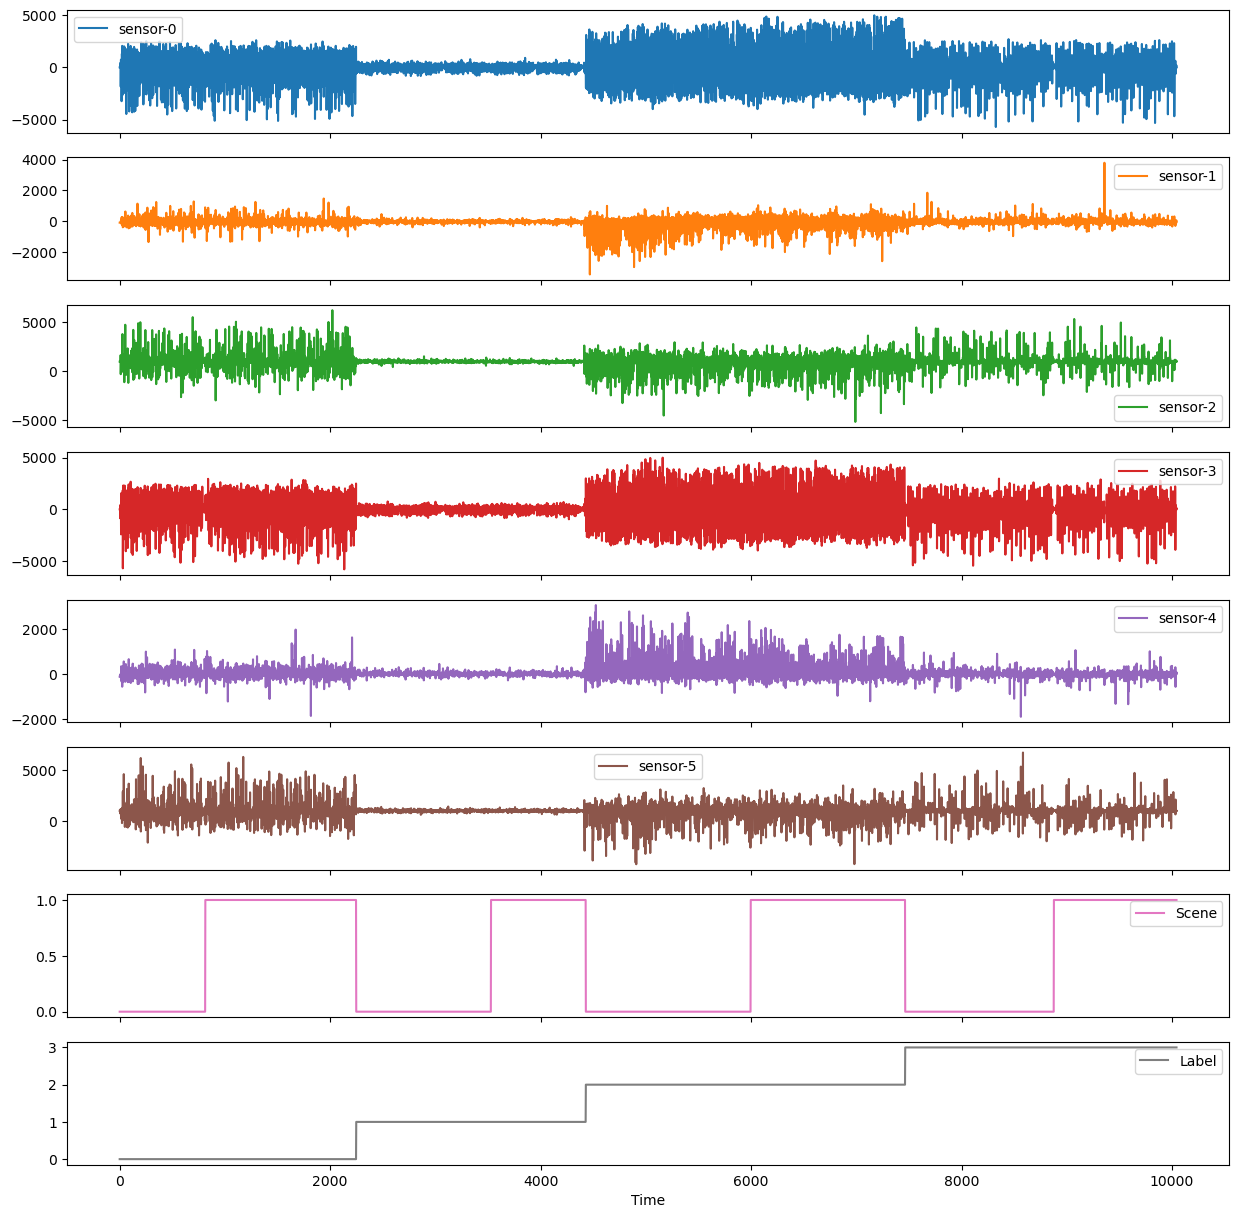

In [7]:
def prinUserSensorMatrix(S,L,Y):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    
    for t in range(0,X.shape[0]):
        ts.append(t)
    df['Time']=ts
    #print(ts)
    for s in range(0,X.shape[2]):
        ls.append("sensor-"+str(s))
        vs=S[:,:,s]
        vs=vs[:,0]
        print(vs.shape)
        df["sensor-"+str(s)]=vs
    

    
    ss=[]
    for t in range(0,X.shape[0]):
        ss.append(L[t])
    df['Scene']=ss
    ls.append('Scene')
    
    ys=[]
    for t in range(0,X.shape[0]):
        ys.append(Y[t])
    df['Label']=ys
    ls.append('Label')

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,15))    
    
prinUserSensorMatrix(X,S,Y)

In [8]:
print(X)       
print(X.shape)       

[[[ 8.15816070e+00 -1.03216574e+02  1.00053000e+03 -1.02585870e+01
   -1.23585667e+02  1.01532000e+03]
  [ 8.31379963e+00 -1.03321403e+02  1.00077000e+03 -1.00232530e+01
   -1.23335424e+02  1.01604500e+03]
  [ 7.93409970e+00 -1.05915509e+02  9.98590000e+02 -1.10043222e+01
   -1.23329403e+02  1.01289500e+03]
  ...
  [ 8.79818157e+00 -1.02136376e+02  9.99560000e+02 -9.03856798e+00
   -1.22709041e+02  1.01168500e+03]
  [ 9.42639965e+00 -1.02756239e+02  9.99070000e+02 -1.01017895e+01
   -1.21544633e+02  1.01241000e+03]
  [ 1.00177976e+01 -1.01432636e+02  9.98100000e+02 -1.02251685e+01
   -1.21236299e+02  1.01289500e+03]]

 [[ 9.12587731e+00 -1.03467575e+02  9.99560000e+02 -9.60794080e+00
   -1.23812924e+02  1.01313500e+03]
  [ 9.15880852e+00 -1.03075823e+02  1.00125500e+03 -9.40316027e+00
   -1.23725124e+02  1.01313500e+03]
  [ 8.23677520e+00 -1.02874495e+02  1.00004500e+03 -9.80598935e+00
   -1.22801427e+02  1.01241000e+03]
  ...
  [ 7.36461796e+00 -1.05949668e+02  9.97620000e+02 -1.12977

In [9]:
Y=to_categorical(Y)

In [10]:
print("nan:",np.argwhere(np.isnan(X)))
print(X[np.argwhere(np.isnan(X))])

nan: []
[]


In [11]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



classes=["B-Herringbone","B-Diagonal","B-DoublePoling","B-KickDoublePoling"]

Y_pred_total=np.array([])
Y_val_total=np.array([])


for sceneid in np.unique(S):

    print("SCENE:",sceneid)
    index_test=np.where(S == sceneid)[0]
    index_train=np.where(S != sceneid)[0]

    print("index_test",index_test)
    print("index_train",index_train)

    x_train=X[index_train]
    x_val=X[index_test]
    y_train=Y[index_train]
    y_val=Y[index_test]

    #normalizamos valores (18 valores=6 señales imu x 3 sensores)
    for ixv in range(0,X.shape[2]):
        print(x_train[:,:,ixv])
        avg_v=np.nanmean(x_train[:,:,ixv].flatten())
        std_v=np.nanstd(x_train[:,:,ixv].flatten())
        print("avg_v,std_v:",avg_v,std_v)
        x_train[:,:,ixv]=(x_train[:,:,ixv]-avg_v)/(std_v)
        x_val[:,:,ixv]=(x_val[:,:,ixv]-avg_v)/(std_v)

    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X.shape[1],X.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))

    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Dense(1024))
    model.add(Dense(len(classes), activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train , y_train,
                        batch_size=64,
                validation_data=(x_val,y_val),
                epochs=25)


    y_pred = model.predict(x_val).argmax(axis=1)
    y_val=y_val.argmax(axis=1)
    print(y_pred)
    print(y_val)
    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,y_val))

    

    

SCENE: 0
index_test [   0    1    2 ... 8874 8875 8876]
index_train [  813   814   815 ... 10041 10042 10043]
[[ 437.80557073  417.85607638  423.86057926 ... -144.90882517
  -128.56980575  123.39692895]
 [ 276.0865419   267.87859416  923.84438549 ... -242.5163486
  -145.54049257 -102.07498793]
 [  40.11182725  149.04192338  178.60365423 ... -289.21585216
  -255.15754445 -256.50443056]
 ...
 [ 216.8215414   228.88050824   94.59403302 ... -118.12320853
  -137.0610408    19.91732701]
 [ 143.67114081  140.85030081  229.40378336 ... -362.22894628
  -106.28429947 -167.92456002]
 [  14.21421958  -40.65104047   36.15217928 ...  593.20140758
  -345.73527845 -392.81842276]]
avg_v,std_v: 21.142412551385874 1323.971536880026
[[-319.79454154 -267.35138051 -275.94475963 ...   40.52383147
    41.62347822  -40.77533513]
 [-356.34949589 -345.75159671  -77.99907874 ... -121.28505396
  -148.04241633  -18.0132069 ]
 [-332.51006311 -334.30780428 -334.30780428 ...  -27.54599828
  -107.38857429 -107.38857429

Epoch 19/25
78/78 [==============================] - 179s 2s/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.1577 - val_accuracy: 0.9831
Epoch 20/25
78/78 [==============================] - 186s 2s/step - loss: 0.0251 - accuracy: 0.9938 - val_loss: 0.0600 - val_accuracy: 0.9882
Epoch 21/25
78/78 [==============================] - 186s 2s/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.0937 - val_accuracy: 0.9846
Epoch 22/25
78/78 [==============================] - 183s 2s/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 0.1343 - val_accuracy: 0.9834
Epoch 23/25
78/78 [==============================] - 182s 2s/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.2163 - val_accuracy: 0.9771
Epoch 24/25
78/78 [==============================] - 176s 2s/step - loss: 8.1499e-05 - accuracy: 1.0000 - val_loss: 0.1944 - val_accuracy: 0.9803
Epoch 25/25
159/159 [==============================] - 20s 122ms/step
[0 0 0 ... 3 3 3]
[0 0 0 ... 3 3 3]
SCENE: 1
index_test [  813   814   815

80/80 [==============================] - 189s 2s/step - loss: 0.0476 - accuracy: 0.9905 - val_loss: 0.1882 - val_accuracy: 0.9676
Epoch 12/25
80/80 [==============================] - 187s 2s/step - loss: 0.0607 - accuracy: 0.9868 - val_loss: 0.1289 - val_accuracy: 0.9795
Epoch 13/25
80/80 [==============================] - 185s 2s/step - loss: 0.0199 - accuracy: 0.9961 - val_loss: 0.1220 - val_accuracy: 0.9825
Epoch 14/25
80/80 [==============================] - 181s 2s/step - loss: 0.0596 - accuracy: 0.9870 - val_loss: 0.1480 - val_accuracy: 0.9736
Epoch 15/25
80/80 [==============================] - 184s 2s/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.1341 - val_accuracy: 0.9801
Epoch 16/25
80/80 [==============================] - 187s 2s/step - loss: 0.0648 - accuracy: 0.9862 - val_loss: 0.0975 - val_accuracy: 0.9811
Epoch 17/25
80/80 [==============================] - 190s 2s/step - loss: 4.8374e-04 - accuracy: 1.0000 - val_loss: 0.1664 - val_accuracy: 0.9807
Epoch 18/25
80

[0. 0. 0. ... 3. 3. 3.]
[0. 0. 0. ... 3. 3. 3.]
[[2181   19    2   45]
 [   0 2170    0   12]
 [  26    0 3009    0]
 [  19   62    0 2499]]
Classification Report TOTAL
                    precision    recall  f1-score   support

     B-Herringbone       0.98      0.97      0.98      2247
        B-Diagonal       0.96      0.99      0.98      2182
    B-DoublePoling       1.00      0.99      1.00      3035
B-KickDoublePoling       0.98      0.97      0.97      2580

          accuracy                           0.98     10044
         macro avg       0.98      0.98      0.98     10044
      weighted avg       0.98      0.98      0.98     10044



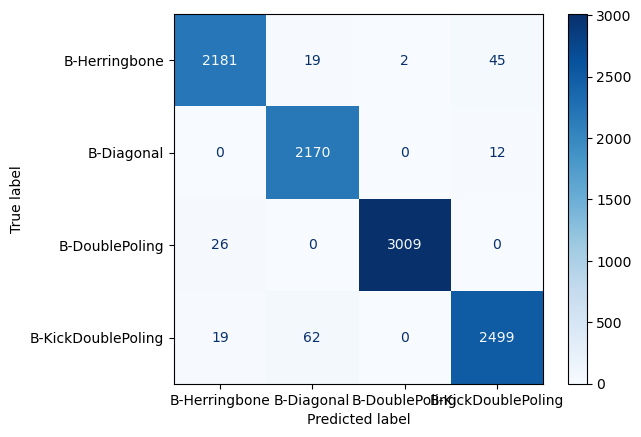

In [12]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()